<a href="https://colab.research.google.com/github/OlgaTihanovich/DataScience/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Выбор датасета для финального проекта
import pandas as pd

'''Для финального проекта был выбран датасет "Набор данных по диагностике психических расстройств".
   В наборе содержатся данные оценки психического здоровья 120 пациентов с различными психологическими симптомами
   и экспертными диагнозами.

   Колонки/симптомы:
Patient Number	(String)	Уникальный идентификатор для каждого пациента
Sadness	        (String)	Указывает на наличие постоянной грусти
Euphoric	      (String)	Указывает на эйфорические/приподнятые состояния настроения
Exhausted	      (String)	Индикатор физического/психического истощения
Sleep dissorder	(String)	Нить	Модели нарушения сна
Mood Swing	    (String)	Индикатор быстрой смены настроения (ДА/НЕТ)
Suicidal thoughts	(String)	Критический индикатор риска (ДА/НЕТ)
Anorxia	        (String)	Симптомы расстройства пищевого поведения (ДА/НЕТ)
Authority Respect	(String)	Модель поведения с властью (ДА/НЕТ)
Try-Explanation	 (String)	Индикатор схемы связи (ДА/НЕТ)
Aggressive Response	(String)	Склонность к агрессии (ДА/НЕТ)
Ignore & Move-On	(String)	Индикатор механизма преодоления трудностей (ДА/НЕТ)
Nervous Break-down (String)	Тяжелые эпизоды тревоги (ДА/НЕТ)
Admit Mistakes	 (String)	Индикатор самосознания (ДА/НЕТ)
Overthinking	   (String)	Модели размышлений (ДА/НЕТ)
Sexual Activity	 (String)	Изменения сексуального поведения
Concentration	   (String)	Проблемы с вниманием/концентрацией
Optimisim	       (String)	Индикатор перспектив/надежды
Expert Diagnose	 (String)	Профессиональный диагноз (целевая переменная)
'''

#загрузка файла
df=pd.read_csv('/content/mental_disorders_dataset.csv')

# Просматриваем первые несколько строк датасета
print("Данные датасета")
print(df.head(10))

# Получаем общую информацию о датасете
print("\nОбщая информация")
print(df.info())

# Выводим статистические данные о числовых столбцах
print("\nСтатистические данные о столбцах")
print(df.describe())

#расчет количества уникальных значений
unique_values=df.nunique()
print(f"Количество уникальных значений\n {unique_values}")

#подсчитаем дубликаты
total_duplicates = df.duplicated().sum()
print(f"Количество полностью совпадающих строк: {total_duplicates}")


Данные датасета
  Patient Number     Sadness    Euphoric   Exhausted Sleep dissorder  \
0     Patiant-01     Usually      Seldom   Sometimes       Sometimes   
1     Patiant-02     Usually      Seldom     Usually       Sometimes   
2     Patiant-03   Sometimes  Most-Often   Sometimes       Sometimes   
3     Patiant-04     Usually      Seldom     Usually      Most-Often   
4     Patiant-05     Usually     Usually   Sometimes       Sometimes   
5     Patiant-06     Usually   Sometimes   Sometimes      Most-Often   
6     Patiant-07      Seldom     Usually      Seldom       Sometimes   
7     Patiant-08     Usually   Sometimes   Sometimes       Sometimes   
8     Patiant-09  Most-Often      Seldom  Most-Often         Usually   
9     Patiant-10     Usually      Seldom  Most-Often       Sometimes   

  Mood Swing Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0        YES              YES       NO                NO             YES   
1         NO               YES      NO 

/tmp/ipython-input-1284789264.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Expert Diagnose', order=df['Expert Diagnose'].value_counts().index, palette="rocket")


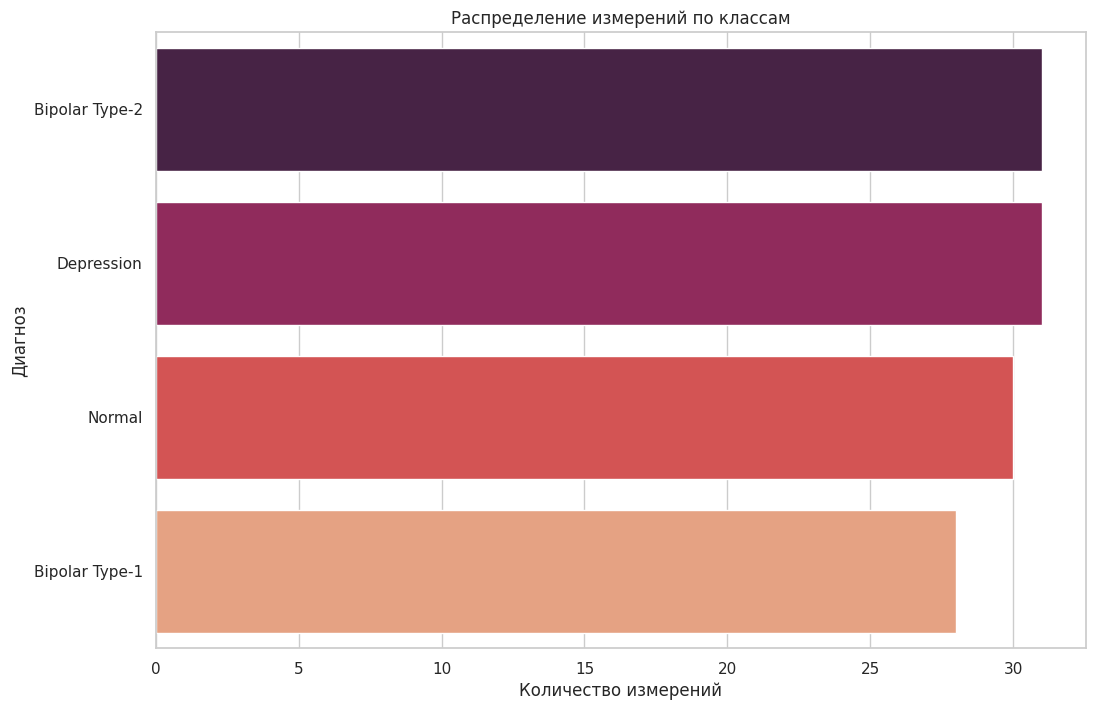

In [16]:
# Визуализируем
import matplotlib.pyplot as plt
import seaborn as sns

# Установка стиля Seaborn для красивых графиков
sns.set(style="whitegrid")

# Построение парных графиков при помощи sns
plt.figure(figsize=(12,8))
sns.countplot(data=df, y='Expert Diagnose', order=df['Expert Diagnose'].value_counts().index, palette="rocket")
plt.title('Распределение измерений по классам')
plt.xlabel('Количество измерений')
plt.ylabel('Диагноз')
plt.show()



In [10]:
#Предварительная оценка: Все строки уникальны. Все значения в колонках заполнены. Нет числовых данных.
#В датасете есть целевая переменная Expert Diagnose. Классы сбалансированы.
#По симптомам можно предсказывать диагноз (попадание в определенный класс/диагноз).

In [11]:
#Предобработка данных
#Требуется преобразование данных в удобный формат для дальнейшей обработки
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Разделение данных на признаки и целевую переменную
#df=df.drop(["Patient Number"], axis=1)
X = df.iloc[:, :-1]
y = df['Expert Diagnose']

#y = df["Expert Diagnose"]
#X = df.drop(["Expert Diagnose"], axis=1)

#Определяем категориальные признаки
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Кодируем категориальные признаки
X = X.copy()
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Кодируем целевую переменную
y_le = LabelEncoder()
y_encoded = y_le.fit_transform(y)

print(X.info())
print(X.columns)
print(X.describe())
print(y_encoded)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Patient Number       120 non-null    int64
 1   Sadness              120 non-null    int64
 2   Euphoric             120 non-null    int64
 3   Exhausted            120 non-null    int64
 4   Sleep dissorder      120 non-null    int64
 5   Mood Swing           120 non-null    int64
 6   Suicidal thoughts    120 non-null    int64
 7   Anorxia              120 non-null    int64
 8   Authority Respect    120 non-null    int64
 9   Try-Explanation      120 non-null    int64
 10  Aggressive Response  120 non-null    int64
 11  Ignore & Move-On     120 non-null    int64
 12  Nervous Break-down   120 non-null    int64
 13  Admit Mistakes       120 non-null    int64
 14  Overthinking         120 non-null    int64
 15  Sexual Activity      120 non-null    int64
 16  Concentration        120 n

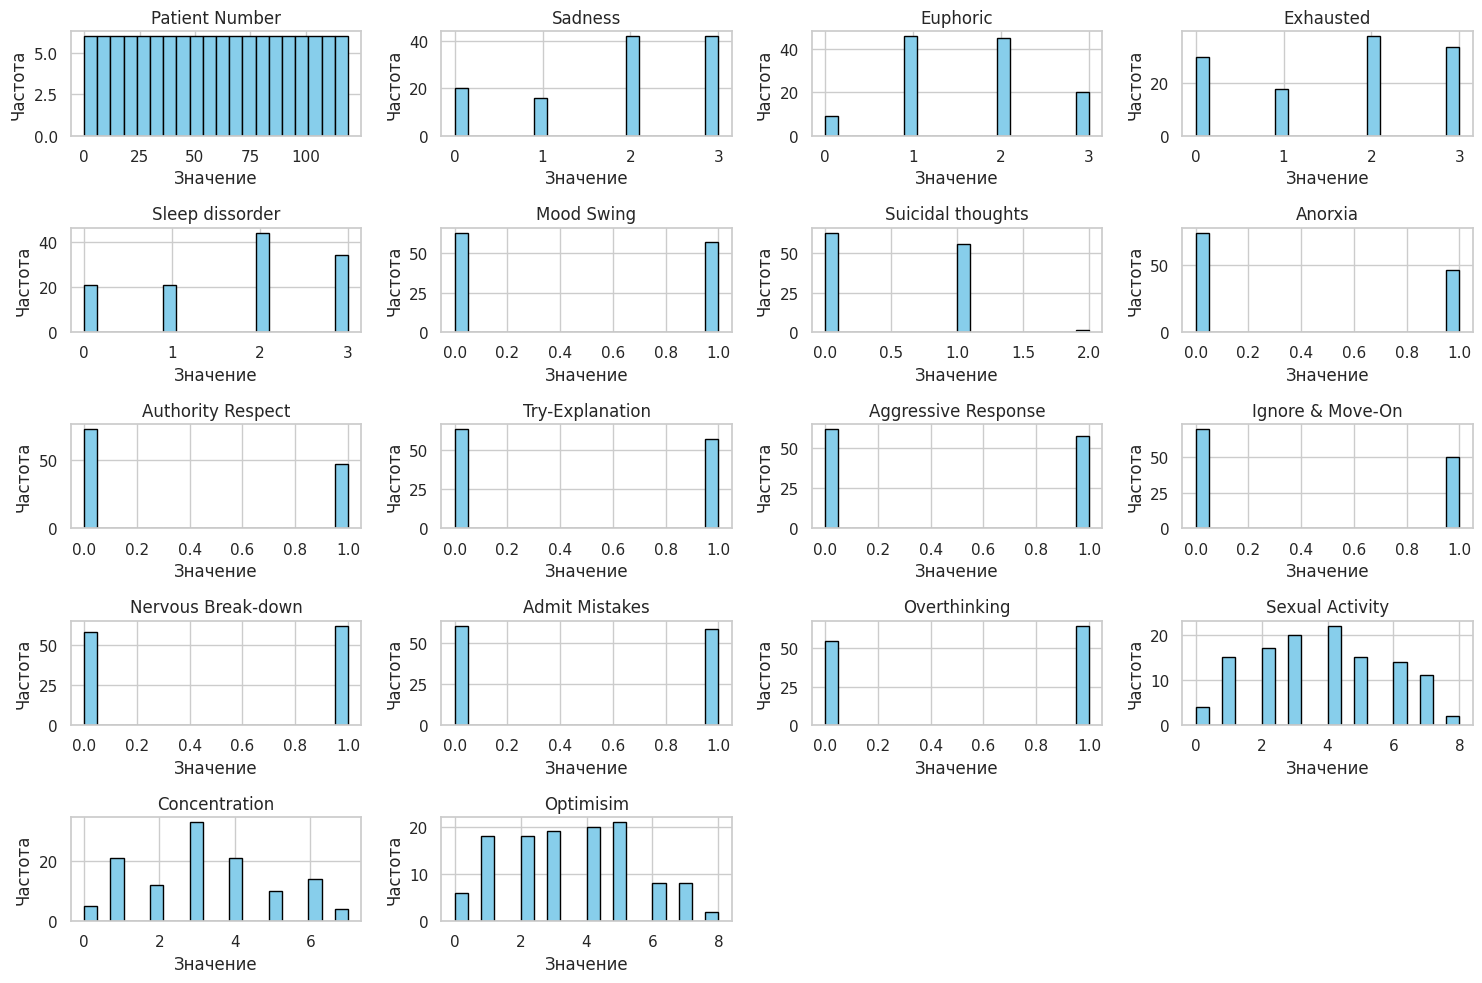

In [12]:
#Визуализация закодированных данных
import matplotlib.pyplot as plt
import seaborn as sns

# Установка стиля Seaborn для красивых графиков
sns.set(style="whitegrid")

# Создание гистограмм для каждой числовой переменной
X.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')

# Добавление названий для каждого графика и осей
for ax in plt.gcf().get_axes():
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')
    ax.set_title(ax.get_title().replace('Expert Diagnose', 'Диагноз'))

# Регулировка макета для предотвращения наложения подписей
plt.tight_layout()

# Показать график
plt.show()

In [ ]:
#Sadness, Euphoric, Exhausted, Sleep disorder
'''Эти признаки имеют шкалу 0–3.
Видно, что распределения неравномерные:
Например, у “Sadness” и “Euphoric” больше значений на 2 и 3 - это может означать,
что значительная часть пациентов испытывает средний или высокий уровень этих симптомов.
У “Exhausted” распределение более равномерное
Такие признаки возможно хорошо могут разделять разные диагнозы (депрессию и норму)'''

#Mood Swing, Suicidal thoughts, Anorxia и другие бинарные (0/1)
'''У большинства этих признаков видно сильное смещение в одну сторону
Возможно можно использовать для выявления специфических состояний, если они характерны для конкретных диагнозов.
Причем для бинарного Suicidal thoughts видно 3 значения, возможная аномалия'''

#Concentration, Optimism, Sexual Activity
'''Это признаки с большим диапазоном (0–7 или 0–8).
 У “Concentration” видно два пика: около 2 и 6
 возможно, есть две группы пациентов с разным уровнем концентрации
“Optimism” и “Sexual Activity” выглядят примерно равномерными или слегка смещёнными '''

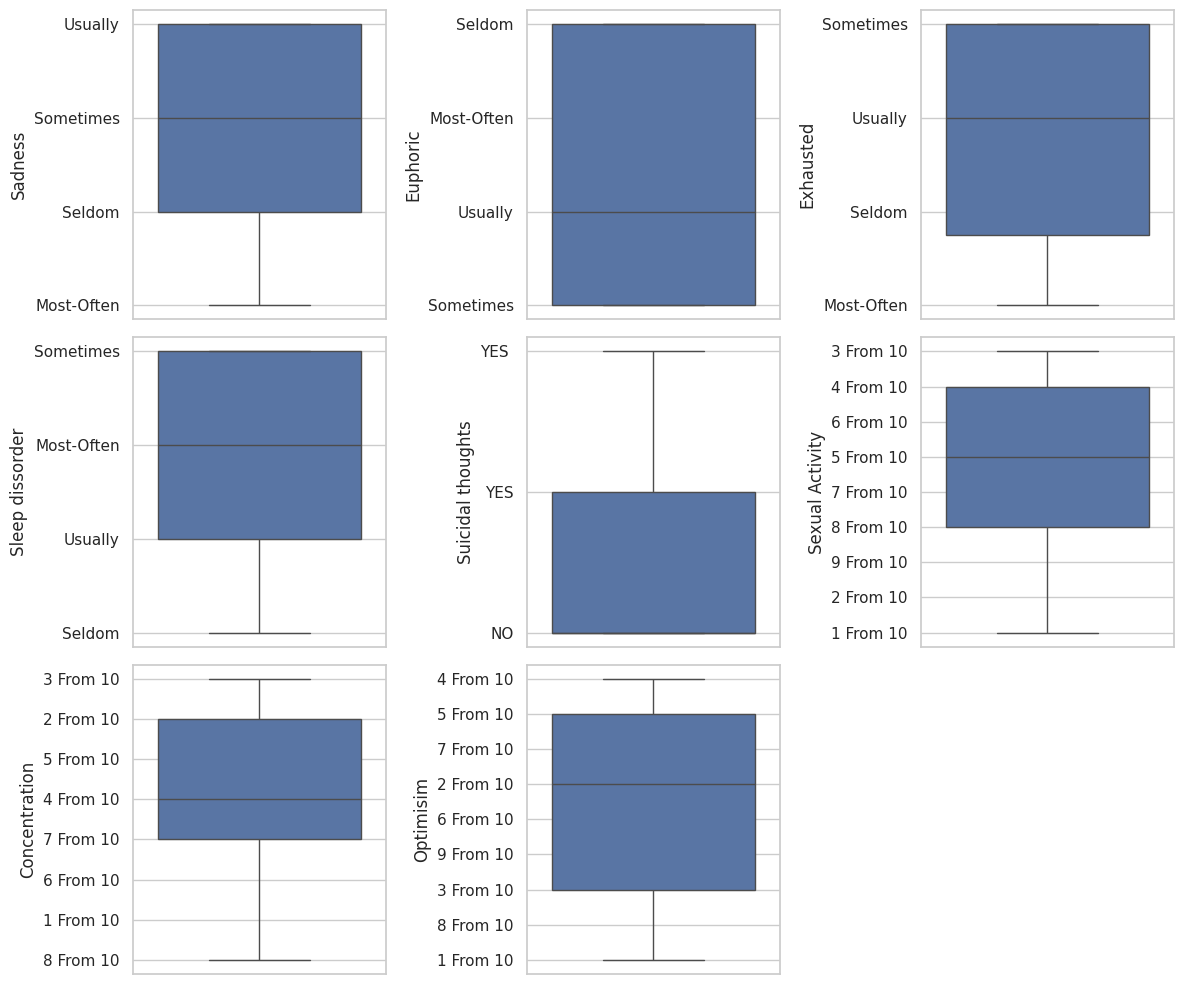


Список уникальных значений для признака Suicidal thoughts
['YES ' 'YES' 'NO']


In [24]:
#Поиск аномалий для небинарных категорий
import seaborn as sns
import matplotlib.pyplot as plt

# Установка стиля Seaborn
sns.set(style="whitegrid")

#выберем небинарные признаки и бинарный с подозрением на аномалию
features=['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder',
        'Suicidal thoughts', 'Sexual Activity', 'Concentration', 'Optimisim']

# Создаем ящики с усами для каждой колонки в DataFrame
plt.figure(figsize=(12, 10))

# Перебираем каждый выбранный столбец и создаем для него ящик с усами
for index, column in enumerate(features):
    plt.subplot((len(features) // 3) + 1, 3, index + 1)
    sns.boxplot(y=df[column])

plt.tight_layout()
plt.show()

#Посмотрим на список значений
print("\nСписок уникальных значений для признака Suicidal thoughts")
print(df['Suicidal thoughts'].unique())

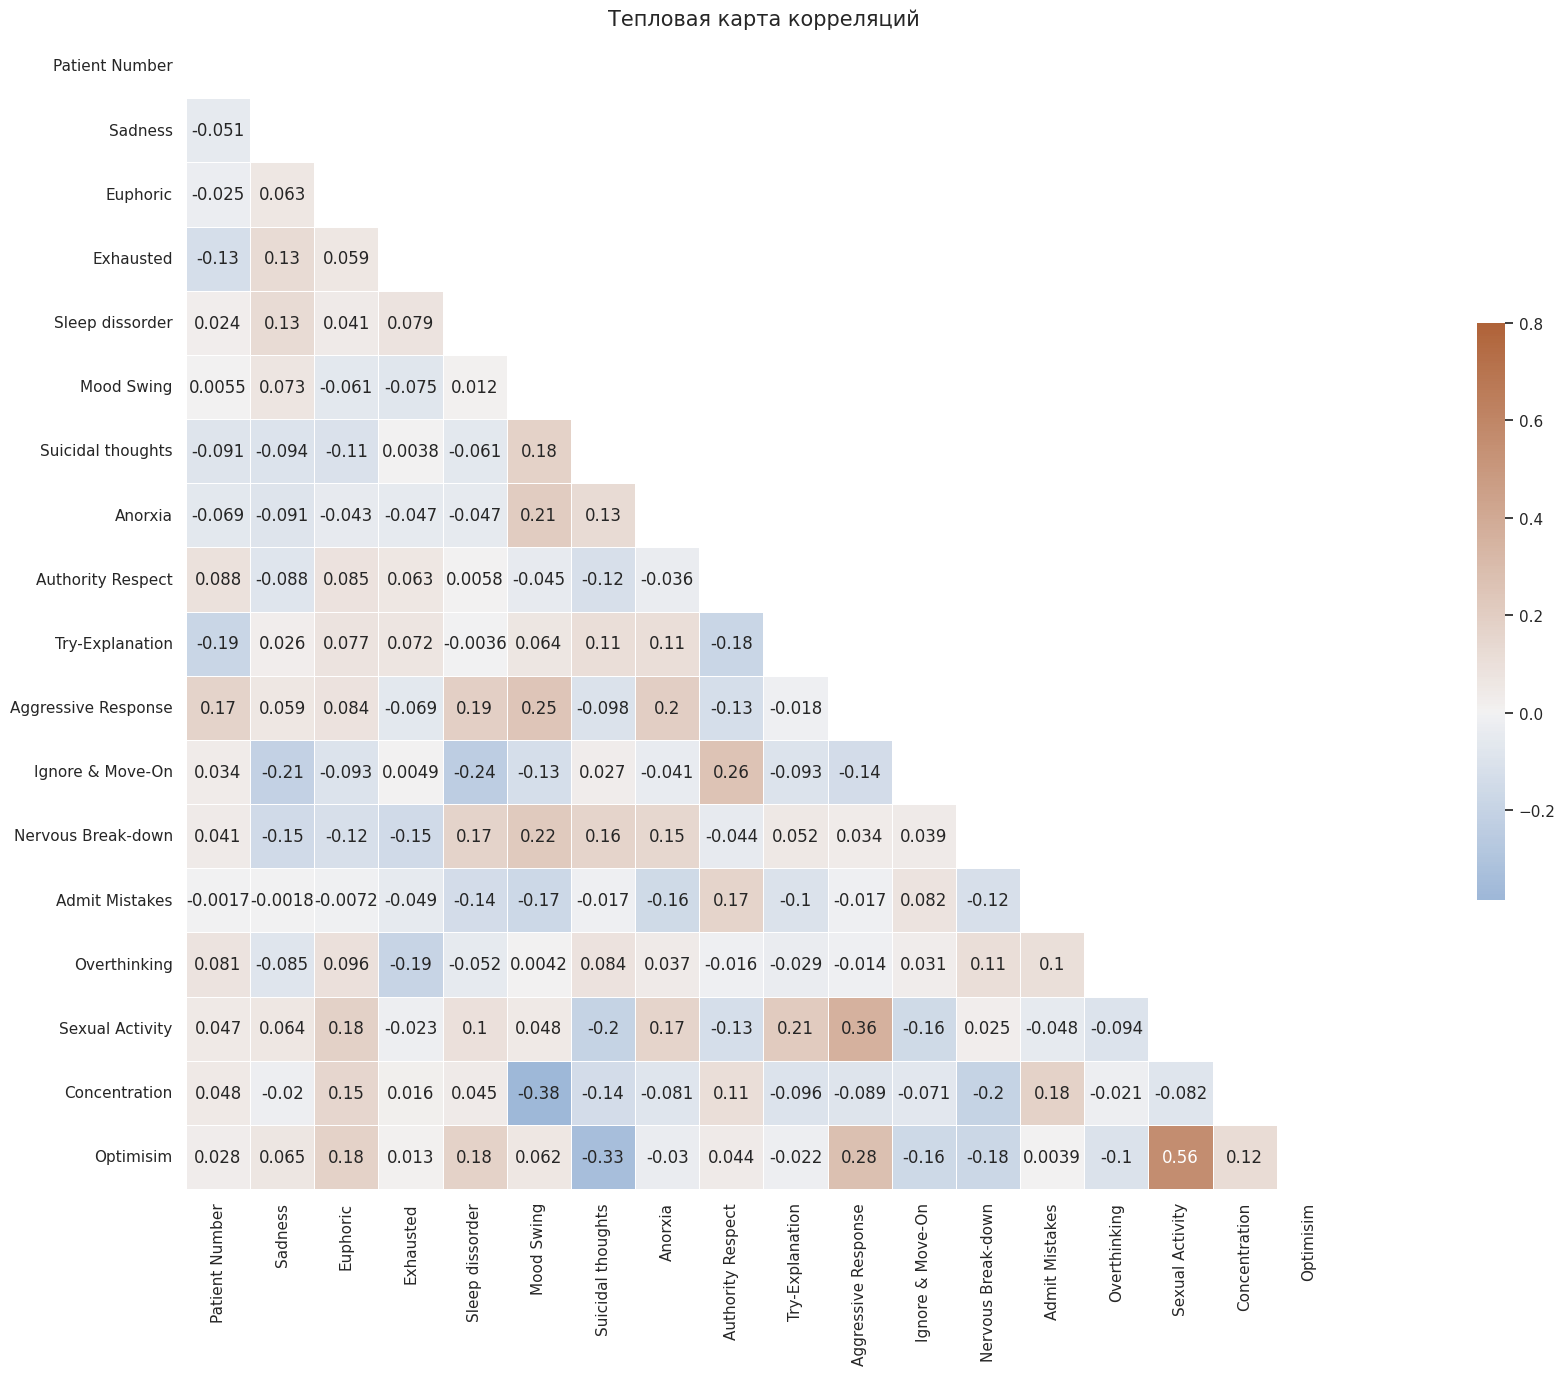

In [20]:
#Посмотрим тепловую карту корреляции
import numpy as np
# Установка стиля Seaborn
sns.set(style="white")

# Расчет корреляционной матрицы только для числовых данных
corr = X.corr()

# Маска для отображения только нижней треугольной части матрицы (опционально)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Настройка цветовой палитры
cmap = sns.diverging_palette(250, 30, as_cmap=True)

# Создание тепловой карты
plt.figure(figsize=(35, 15))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Добавление заголовка
plt.title('Тепловая карта корреляций', fontsize=15)

# Показать график
plt.show()


In [21]:
#вывод по итогам корреляционной матрицы:
'''Матрица показывает, что большинство психоэмоциональных признаков относительно независимы,
 но отдельные пары могут указывать на потенциальные "узлы" психологической симптоматики или ассоциаций,
 требующих детального клинического или поведенческого анализа'''

'Матрица показывает, что большинство психоэмоциональных признаков относительно независимы,\n но отдельные пары могут указывать на потенциальные "узлы" психологической симптоматики или ассоциаций, \n требующих детального клинического или поведенческого анализа'

In [41]:
#Предобучение, обучение и метрики
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение моделей
log_reg = LogisticRegression(C=1.4, random_state=24, max_iter=250)
log_reg.fit(X_train_scaled, y_train)

rf = RandomForestClassifier(n_estimators=300,max_depth=8,random_state=30)
rf.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# Оценка моделей
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_log_reg = classification_report(y_test, y_pred_log_reg)
report_rf = classification_report(y_test, y_pred_rf)

print("LogisticRegression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

print("RandomForestClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

LogisticRegression
Accuracy: 0.7916666666666666
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.67      1.00      0.80         6
           2       0.75      1.00      0.86         6
           3       1.00      0.50      0.67         6

    accuracy                           0.79        24
   macro avg       0.85      0.79      0.78        24
weighted avg       0.85      0.79      0.78        24

Confusion Matrix:
[[4 2 0 0]
 [0 6 0 0]
 [0 0 6 0]
 [0 1 2 3]]
RandomForestClassifier
Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.75      1.00      0.86         6
           2       0.75      1.00      0.86         6
           3       1.00      0.50      0.67         6

    accuracy                           0.83        24
   macro avg       0.88      0

Распределение классов: Counter({'Bipolar Type-2': 31, 'Depression': 31, 'Normal': 30, 'Bipolar Type-1': 28})
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшие параметры: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Лучшая точность (CV): 0.8636842105263158
Accuracy на тестовых данных: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.67      1.00      0.80         6
           2       0.75      1.00      0.86         6
           3       1.00      0.50      0.67         6

    accuracy                           0.79        24
   macro avg       0.85      0.79      0.78        24
weighted avg       0.85      0.79      0.78        24

Confusion Matrix:
[[4 2 0 0]
 [0 6 0 0]
 [0 0 6 0]
 [0 1 2 3]]
Training Accuracy: 1.00


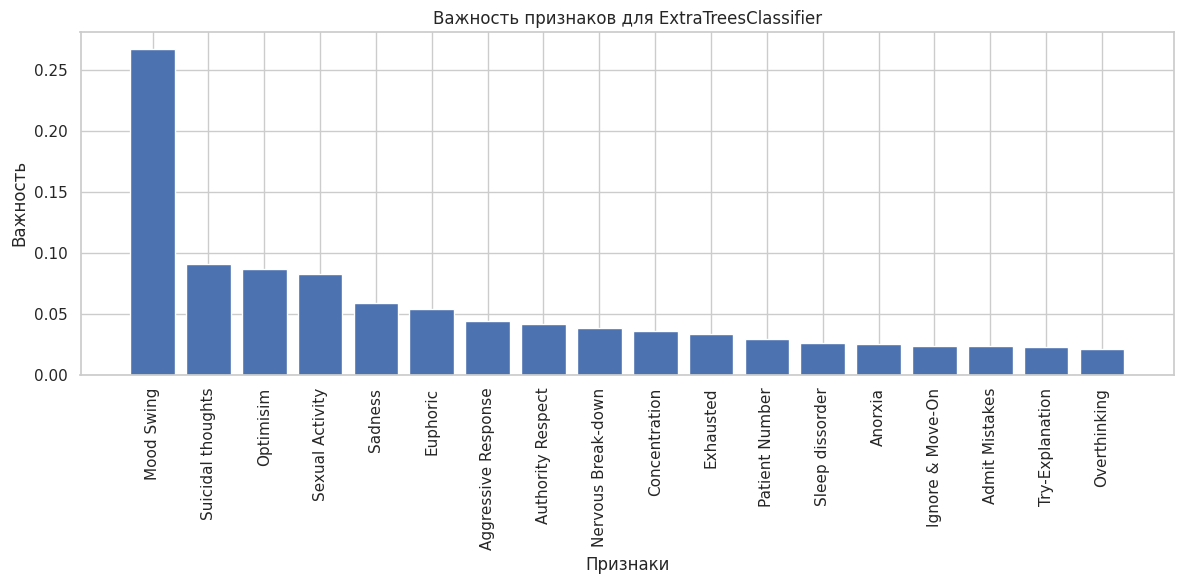

Кросс-валидационные оценки: [0.75       0.875      0.66666667 0.91666667 0.875     ]
Средняя кросс-валидационная точность: 0.82 ± 0.09


In [42]:
# ExtraTreesClassifier
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Проверка распределения классов
from collections import Counter
print("Распределение классов:", Counter(y))

# Разделение данных на обучающую и тестовую выборки с сохранением пропорций классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y
)

# Создание и обучение классификатора Extra Trees с использованием GridSearchCV для подбора гиперпараметров
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Инициализация ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=42)

# Настройка GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и точности
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность (CV):", grid_search.best_score_)

# Использование лучшей модели для прогнозирования
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy на тестовых данных: {accuracy:.2f}')
print('Classification Report:')
print(report)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Точность на обучающей выборке для проверки переобучения
y_train_pred = best_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Визуализация важности признаков
feature_importances = best_clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
feature_names = np.array(X.columns)

plt.figure(figsize=(12, 6))
plt.title("Важность признаков для ExtraTreesClassifier")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.tight_layout()
plt.show()

# Кросс-валидация для дополнительной оценки модели
cv_scores = cross_val_score(best_clf, X, y_encoded, cv=5, scoring='accuracy')
print(f'Кросс-валидационные оценки: {cv_scores}')
print(f'Средняя кросс-валидационная точность: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

Number of clusters: 2, 
Silhouette Score: 0.60, 
Davies-Bouldin Index: 0.53, 
Inertia: 38126.35, Calinski-Harabasz Index: 334.28

Number of clusters: 2, ARI: -0.01, NMI: 0.00, Completeness: 0.00, Homogeneity: 0.00, V-measure: 0.00


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


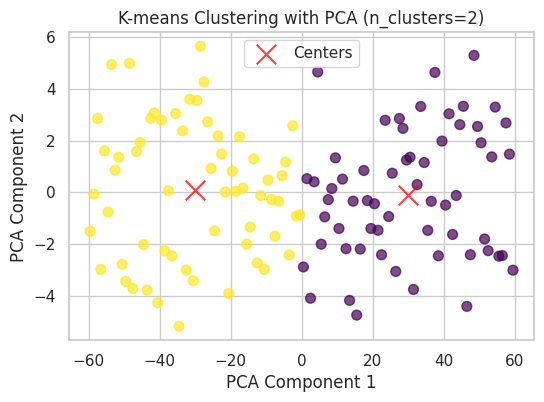

Number of clusters: 3, 
Silhouette Score: 0.54, 
Davies-Bouldin Index: 0.56, 
Inertia: 18089.49, Calinski-Harabasz Index: 414.09

Number of clusters: 3, ARI: -0.02, NMI: 0.00, Completeness: 0.00, Homogeneity: 0.00, V-measure: 0.00


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


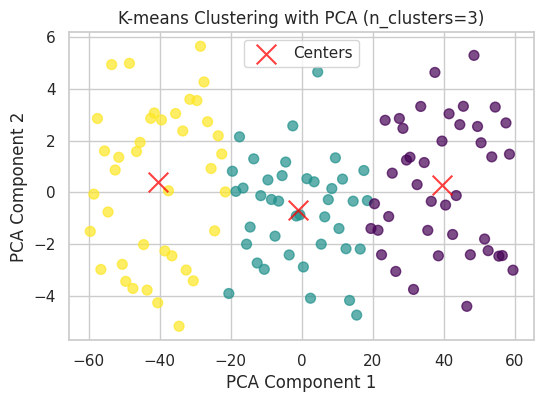

Number of clusters: 4, 
Silhouette Score: 0.50, 
Davies-Bouldin Index: 0.59, 
Inertia: 11131.69, Calinski-Harabasz Index: 468.94

Number of clusters: 4, ARI: -0.02, NMI: 0.01, Completeness: 0.01, Homogeneity: 0.01, V-measure: 0.01


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


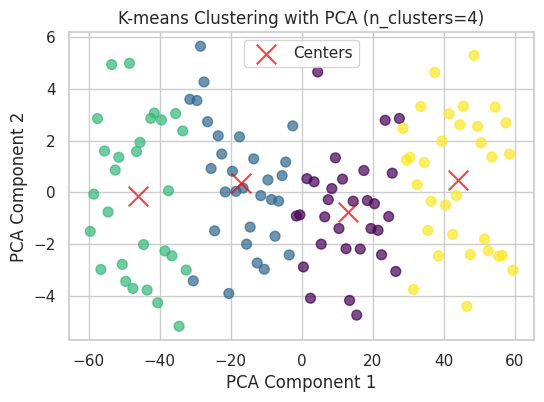

Number of clusters: 5, 
Silhouette Score: 0.46, 
Davies-Bouldin Index: 0.63, 
Inertia: 7842.28, Calinski-Harabasz Index: 506.98

Number of clusters: 5, ARI: -0.02, NMI: 0.01, Completeness: 0.01, Homogeneity: 0.01, V-measure: 0.01


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


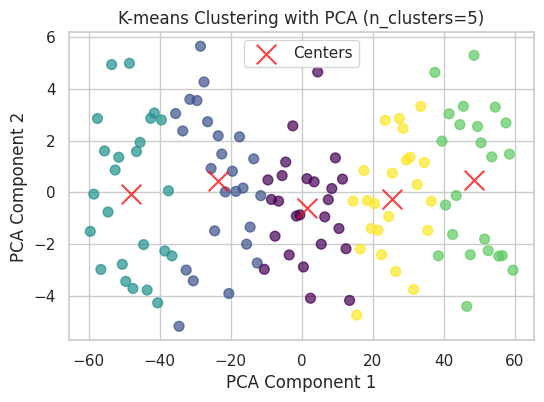

Number of clusters: 6, 
Silhouette Score: 0.42, 
Davies-Bouldin Index: 0.68, 
Inertia: 6084.42, Calinski-Harabasz Index: 524.81

Number of clusters: 6, ARI: -0.03, NMI: 0.00, Completeness: 0.00, Homogeneity: 0.00, V-measure: 0.00


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


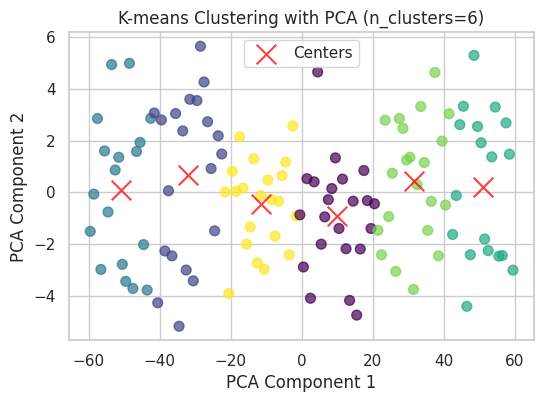

Number of clusters: 7, 
Silhouette Score: 0.39, 
Davies-Bouldin Index: 0.74, 
Inertia: 5062.98, Calinski-Harabasz Index: 524.76

Number of clusters: 7, ARI: -0.03, NMI: 0.01, Completeness: 0.01, Homogeneity: 0.01, V-measure: 0.01


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


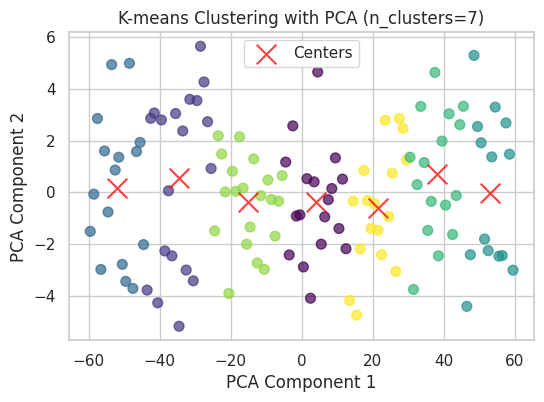

Number of clusters: 8, 
Silhouette Score: 0.37, 
Davies-Bouldin Index: 0.78, 
Inertia: 4358.35, Calinski-Harabasz Index: 520.48

Number of clusters: 8, ARI: -0.03, NMI: 0.02, Completeness: 0.01, Homogeneity: 0.02, V-measure: 0.02


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


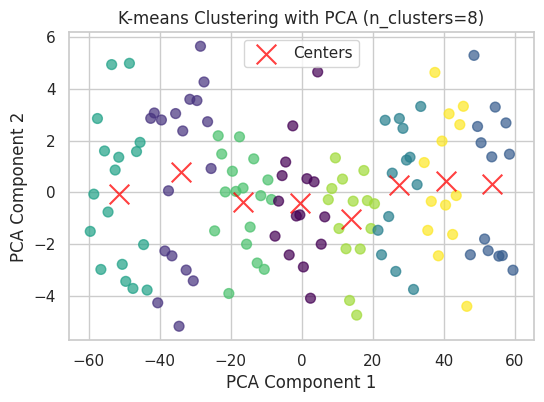

Number of clusters: 9, 
Silhouette Score: 0.34, 
Davies-Bouldin Index: 0.82, 
Inertia: 3778.69, Calinski-Harabasz Index: 522.72

Number of clusters: 9, ARI: -0.03, NMI: 0.01, Completeness: 0.01, Homogeneity: 0.02, V-measure: 0.01


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


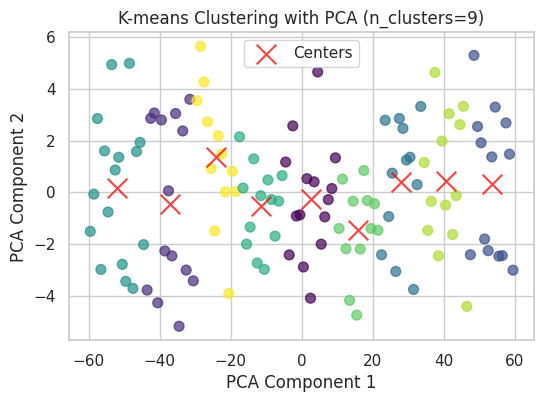

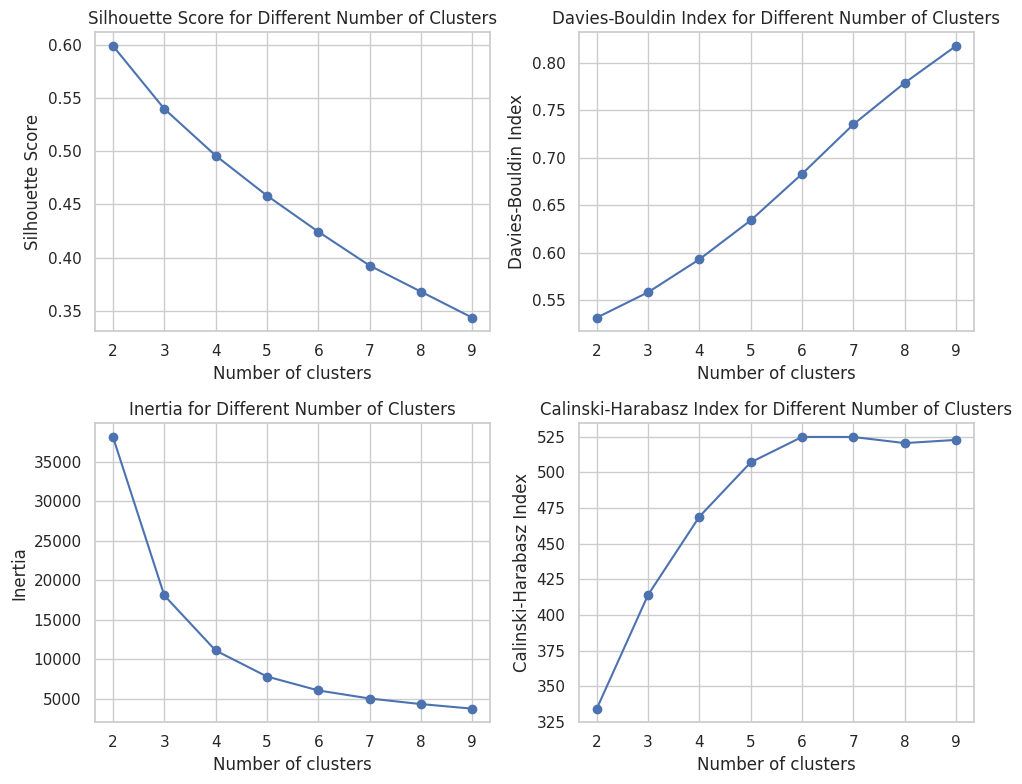

In [70]:
#решим задачу сегментации
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, completeness_score, homogeneity_score, v_measure_score

# Списки для хранения значений метрик
silhouette_scores = []
davies_bouldin_scores = []
inertia_scores = []
calinski_harabasz_scores = []
ari_scores = []
nmi_scores = []
completeness_scores = []
homogeneity_scores = []
v_measure_scores = []

# Проверка качества кластеризации для разного числа кластеров
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)

    # Оценка метрик
    silhouette_avg = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    inertia = kmeans.inertia_
    calinski_harabasz = calinski_harabasz_score(X, labels)

    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(davies_bouldin)
    inertia_scores.append(inertia)
    calinski_harabasz_scores.append(calinski_harabasz)

    # Вычисление внешних метрик
    ari = adjusted_rand_score(y_encoded, labels)
    nmi = normalized_mutual_info_score(y_encoded, labels)
    completeness = completeness_score(y_encoded, labels)
    homogeneity = homogeneity_score(y_encoded, labels)
    v_measure = v_measure_score(y_encoded, labels)

    ari_scores.append(ari)
    nmi_scores.append(nmi)
    completeness_scores.append(completeness)
    homogeneity_scores.append(homogeneity)
    v_measure_scores.append(v_measure)

    print(f"Number of clusters: {n_clusters}, "
          f"\nSilhouette Score: {silhouette_avg:.2f}, "
          f"\nDavies-Bouldin Index: {davies_bouldin:.2f}, "
          f"\nInertia: {inertia:.2f}, Calinski-Harabasz Index: {calinski_harabasz:.2f}")

    print(f"\nNumber of clusters: {n_clusters}, ARI: {ari:.2f}, NMI: {nmi:.2f}, Completeness: {completeness:.2f}, Homogeneity: {homogeneity:.2f}, V-measure: {v_measure:.2f}")

    # Применяем PCA для уменьшения размерности до 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Визуализация кластеров
    plt.figure(figsize=(6, 4))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=50, cmap='viridis', alpha=0.7)

    # Отображение центров кластеров
    centers_pca = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers_pca[:,0], centers_pca[:,1], c='red', s=200, alpha=0.75,
                label='Centers', marker='x')

    plt.title(f"K-means Clustering with PCA (n_clusters={n_clusters})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()

# Визуализация изменения метрик
plt.figure(figsize=(10, 8))

# Silhouette Score
plt.subplot(2, 2, 1)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters')

# Davies-Bouldin Index
plt.subplot(2, 2, 2)
plt.plot(range(2, 10), davies_bouldin_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Number of Clusters')

# Inertia
plt.subplot(2, 2, 3)
plt.plot(range(2, 10), inertia_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia for Different Number of Clusters')

# Calinski-Harabasz Index
plt.subplot(2, 2, 4)
plt.plot(range(2, 10), calinski_harabasz_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Different Number of Clusters')

plt.tight_layout()
plt.show()

Количество кластеров: 7
Кластер 1 - Центр: [7 3 2 2 2 0 0 0 0 1 0 0 0 0 1 4 4 4], Количество объектов: 15
Кластер 2 - Центр: [36  2  2  2  2  1  0  1  0  1  1  0  0  0  1  5  3  5], Количество объектов: 16
Кластер 3 - Центр: [55  2  1  2  1  0  0  0  1  1  0  1  0  1  0  4  4  5], Количество объектов: 22
Кластер 4 - Центр: [80  1  0  1  1  0  0  1  0  1  0  1  0  1  0  4  3  3], Количество объектов: 22
Кластер 5 - Центр: [99  3  2  2  1  0  0  0  0  1  1  1  0  0  0  5  5  5], Количество объектов: 16
Кластер 6 - Центр: [113   2   3   0   3   0   0   0   1   0   0   0   0   1   1   4   6   5], Количество объектов: 14
Кластер 7 - Центр: [22  2  0  3  3  0  0  0  1  0  0  0  0  1  0  3  6  4], Количество объектов: 15


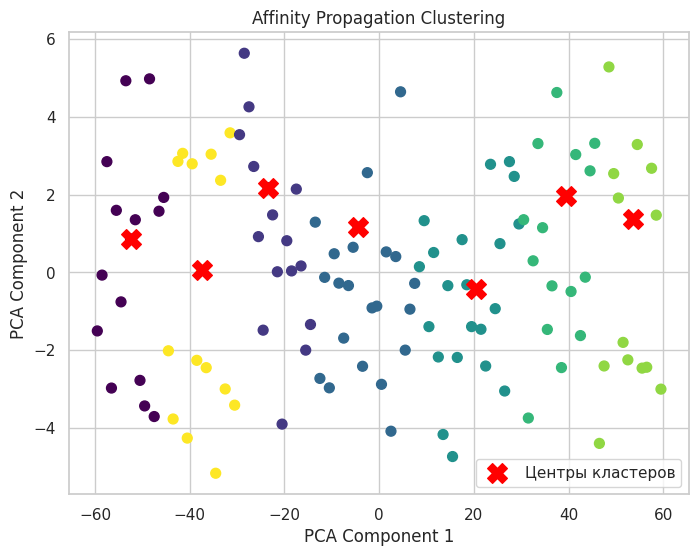

Силуэтовская оценка: 0.38
Индекс Дэвиса-Болдуина: 0.75
Индекс Калински-Харабаса: 505.07


In [74]:
#Метод распространения близости
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Создание модели Affinity Propagation
af = AffinityPropagation(random_state=0)

# Обучение модели
af.fit(X)

# Получение кластеров и их центров
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

# Вывод результатов
n_clusters_ = len(cluster_centers_indices)
print(f"Количество кластеров: {n_clusters_}")

for i in range(n_clusters_):
    cluster_center = X.iloc[cluster_centers_indices[i]]   # Используем iloc для строк
    cluster_objects = X.iloc[labels == i]
    print(f"Кластер {i + 1} - Центр: {cluster_center.values}, Количество объектов: {len(cluster_objects)}")

# Применяем PCA для уменьшения размерности до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', s=50)

# Отображение центров кластеров в PCA-пространстве
centers_pca = X_pca[cluster_centers_indices]
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Центры кластеров')

plt.title('Affinity Propagation Clustering')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# Вычисление метрик качества
silhouette_avg = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)

print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")